# Telco Customer Churn EDA

## Task Description ##

In this analysis I will focus on exploring the telco customer churn dataset. 
The target variable is 'churn' which indicates if a customer has cancelled their contract. 

The goal of this analysis is to identify patterns and correlations with the target variable and finally list some potential action items for a potential management audience. 

## Documentation ## 

This dataset was downloaded from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn/version/1?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)

The data dictionary can be found the [IBM Communit URL](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Documents\dataSets\telco_customer_churn.csv')

# Data Understanding

In this section, we will focus on inspecting the data surface properties: 
 
- data format 
- number of records and features
- missing values

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing Values

I want to get an idea of I should expect within each column for better understanding of telco stored data. 
I am going to iterate through all columns and return a list of the unique values stored in which one of them.

In [8]:
for c in df.columns: 
    print(f"Column:{c}",df[c].unique() )

Column:customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column:gender ['Female' 'Male']
Column:SeniorCitizen [0 1]
Column:Partner ['Yes' 'No']
Column:Dependents ['No' 'Yes']
Column:tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:PhoneService ['No' 'Yes']
Column:MultipleLines ['No phone service' 'No' 'Yes']
Column:InternetService ['DSL' 'Fiber optic' 'No']
Column:OnlineSecurity ['No' 'Yes' 'No internet service']
Column:OnlineBackup ['Yes' 'No' 'No internet service']
Column:DeviceProtection ['No' 'Yes' 'No internet service']
Column:TechSupport ['No' 'Yes' 'No internet service']
Column:StreamingTV ['No' 'Yes' 'No internet service']
Column:StreamingMovies ['No' 'Yes' 'No internet service']
Column:Contract ['Month-to-month' 'One year' 'Two year']
Column:Pape

- Boolean values are mainly stored in Yes/No Format. 
- No cleansing needed within columns.
- Total Charges is Obj Type. Why? 


In [10]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [33]:
df['TotalCharges'].sample(10)

1028     2070.6
616       186.3
1725    1608.15
6650     123.65
632      6562.9
5223     1538.6
4196    1764.75
3823    5763.15
5332    2813.05
1363     6474.4
Name: TotalCharges, dtype: object

There are no characters attached to the total charges column. I will try to convert the column into float.

In [34]:
pd.to_numeric(df['TotalCharges'], errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [35]:
df['TotalCharges'].isna().sum()

0

**Logic**:

- I could assume that those values should be 0 as it could have originally been stored as NULL and finally replaced with empty string
- To support this idea I could have a look at the 'Tenure'. If the tenure is 0 then we can assume that these are new customers and the monthly charges value should be 0

In [15]:
df['tenure'][df.TotalCharges== ' ']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

The hypothesis is confirmed. All observations where 'TotalCharges' equals ' ' have 0 tenure.
But what about the 'Monthly Charges'?

In [16]:
df['MonthlyCharges'][df.TotalCharges== ' ']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [19]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [20]:
df['TotalCharges'] =df.TotalCharges.str.strip()

In [21]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].dtype

dtype('float64')

In [23]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

I want to store all Obj Data in lower cases.

In [16]:
for c in df.columns: 
    if df[c].dtype == 'O':
        df[c] = df[c].str.lower()

Verify applied steps

In [17]:
for c in df.columns: 
    print(f"Column:{c}",df[c].unique() )

Column:customerID ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
Column:gender ['female' 'male']
Column:SeniorCitizen [0 1]
Column:Partner ['yes' 'no']
Column:Dependents ['no' 'yes']
Column:tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column:PhoneService ['no' 'yes']
Column:MultipleLines ['no phone service' 'no' 'yes']
Column:InternetService ['dsl' 'fiber optic' 'no']
Column:OnlineSecurity ['no' 'yes' 'no internet service']
Column:OnlineBackup ['yes' 'no' 'no internet service']
Column:DeviceProtection ['no' 'yes' 'no internet service']
Column:TechSupport ['no' 'yes' 'no internet service']
Column:StreamingTV ['no' 'yes' 'no internet service']
Column:StreamingMovies ['no' 'yes' 'no internet service']
Column:Contract ['month-to-month' 'one year' 'two year']
Column:Pape

## Observations on the Data ## 

The data set describes personas and membership details. 

We can try to identify trends and patterns related to the churn label based on two aspects. 


We are now confident to have a clean base to work on. The data understanding part is over and we will switch now to data exploration. 


## Plotting Categorical Data ##

First of all let's have a look at the telco churn rate. 

In [18]:
churn_share = round(df.Churn.value_counts()/len(df),2)
churn_share

no     0.73
yes    0.27
Name: Churn, dtype: float64

27% of the customers have stopped their memebership with the phone provider.

Let's have a look at the categorical data to identify which groups have a higer share of cancellations.

In [19]:
# Define Plot Style https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')

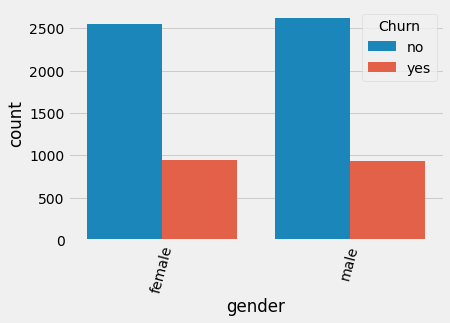

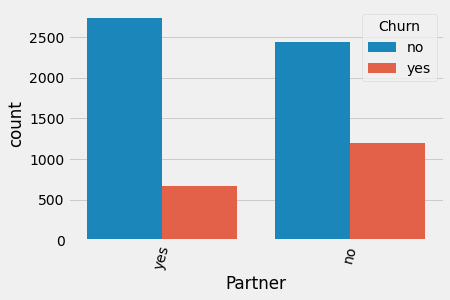

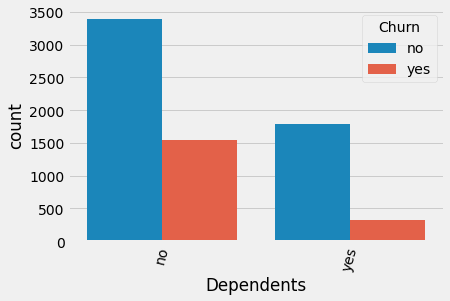

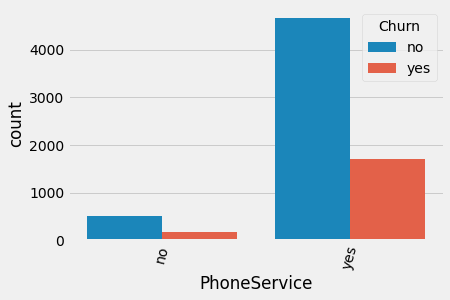

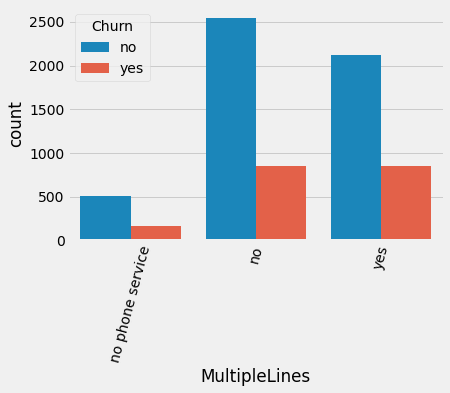

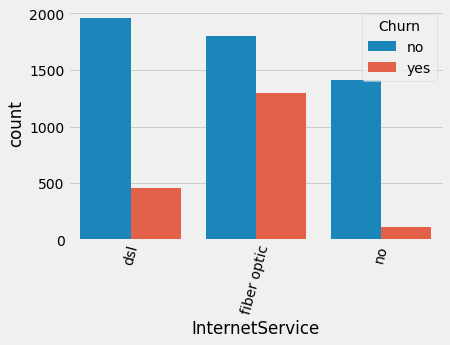

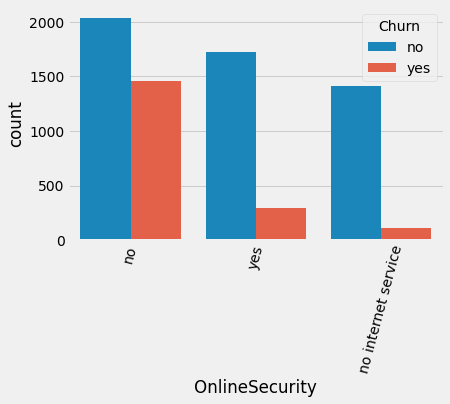

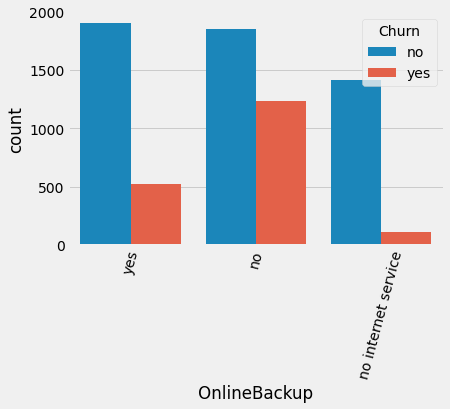

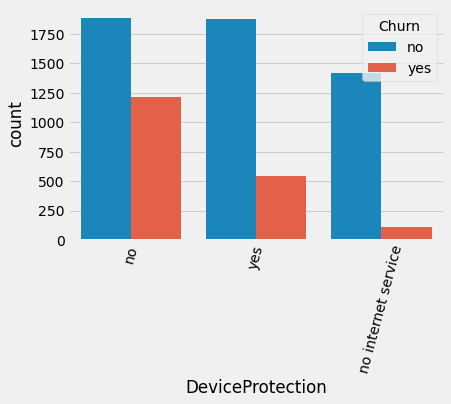

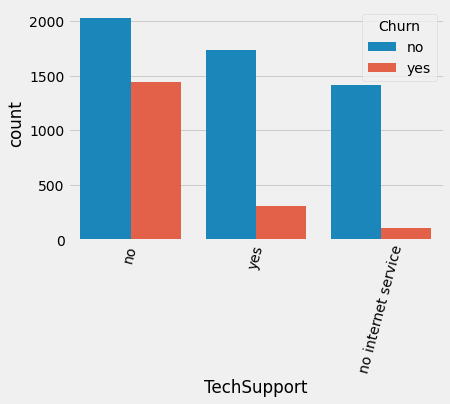

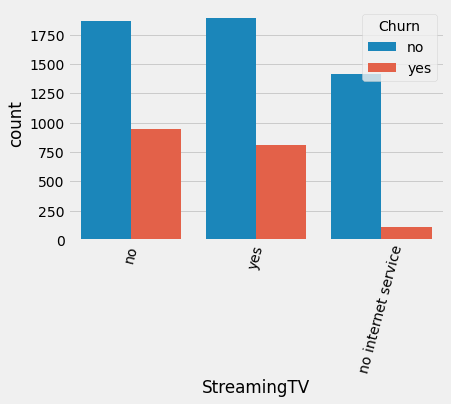

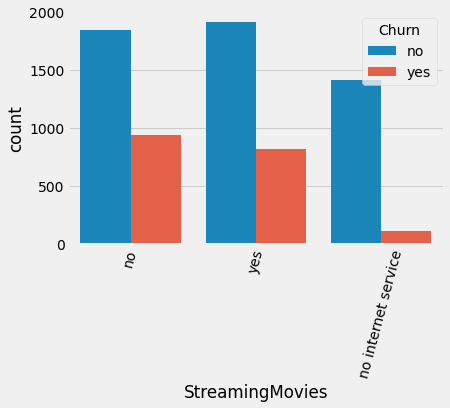

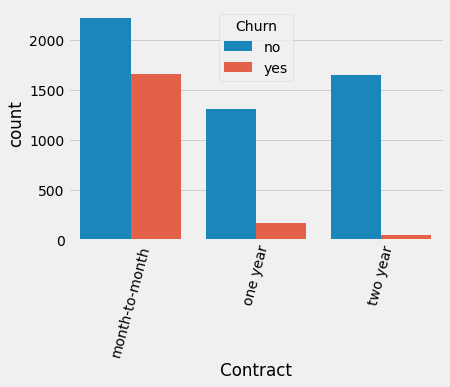

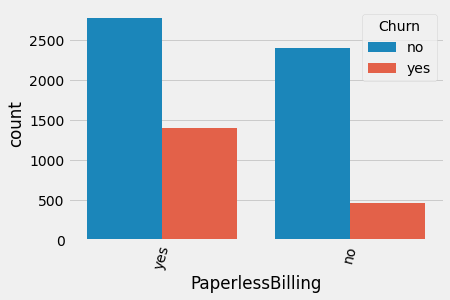

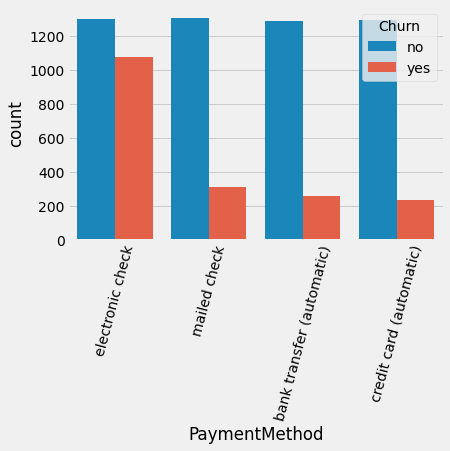

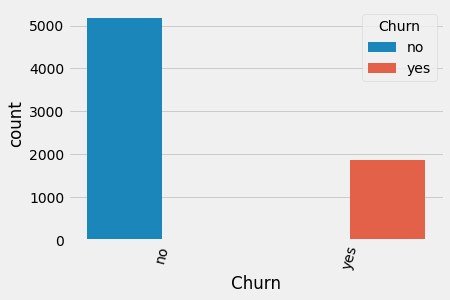

In [20]:
for c, n in enumerate([c for c in df.columns if df[c].dtype == 'O' and c != 'customerID']): 
    plt.figure(c)
    _ = sns.countplot(data = df, x = n, hue = 'Churn')
    plt.xticks(rotation =75)

I'm defining afunction to generate the percentage of total churn compared to a user-defined variable
It will return a correlation heatmap showing the different percentages within groups.

In [26]:
def percentage_of_totals(col1,data = df,target = 'Churn'): 
    ct = pd.crosstab(data[target], 
                     data[col1], 
                     normalize = 'index')
    sns.heatmap(ct, annot = True)
    plt.show()

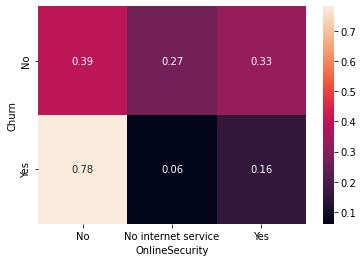

In [34]:
percentage_of_totals('OnlineSecurity')

Observations: 
- Churn by gender seems to be equally spread
- Not having a partner lead 53% of the times to churn
- Not having dependents lead 83% of the times to churn. This can be expected as it goes in relation with not having a partner
- Most of the customers have phone service. In this case the share of cancellations is at 90% for both outcomes
- Multiple lines also doesn't show a pattern (share is equally spread)
- Internet service shows 69% churns when fiber optic was part of the membership
- Online security is an additional internet service. Not owning it leads to 70% churn. I currently don't understand the role of this feature and I'll think about it later on.
- We don't know if this online addons are related to fiber which has a high churn rate or to dsl which on the contrary has a low churn rate. I will need to compare the 3 variables to make a story out of it.
    - there are 3 scenarios: 
      1. No internet --> Low churn rate --> no online addons --> low churn
      2. Internet DSL --> Lower churn among internet service --> having addons -- > lower churn rate
      3. Internet Fiber --> Highest churn rate among internet services --> not owning addons --> high churn
- Groupping by internet service and online security leads to an interesting result:
 

In [49]:
df.groupby(['InternetService','OnlineSecurity']).Churn.value_counts(normalize = True)

InternetService  OnlineSecurity       Churn
DSL              No                   No       0.720387
                                      Yes      0.279613
                 Yes                  No       0.905085
                                      Yes      0.094915
Fiber optic      No                   No       0.506424
                                      Yes      0.493576
                 Yes                  No       0.781883
                                      Yes      0.218117
No               No internet service  No       0.925950
                                      Yes      0.074050
Name: Churn, dtype: float64

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

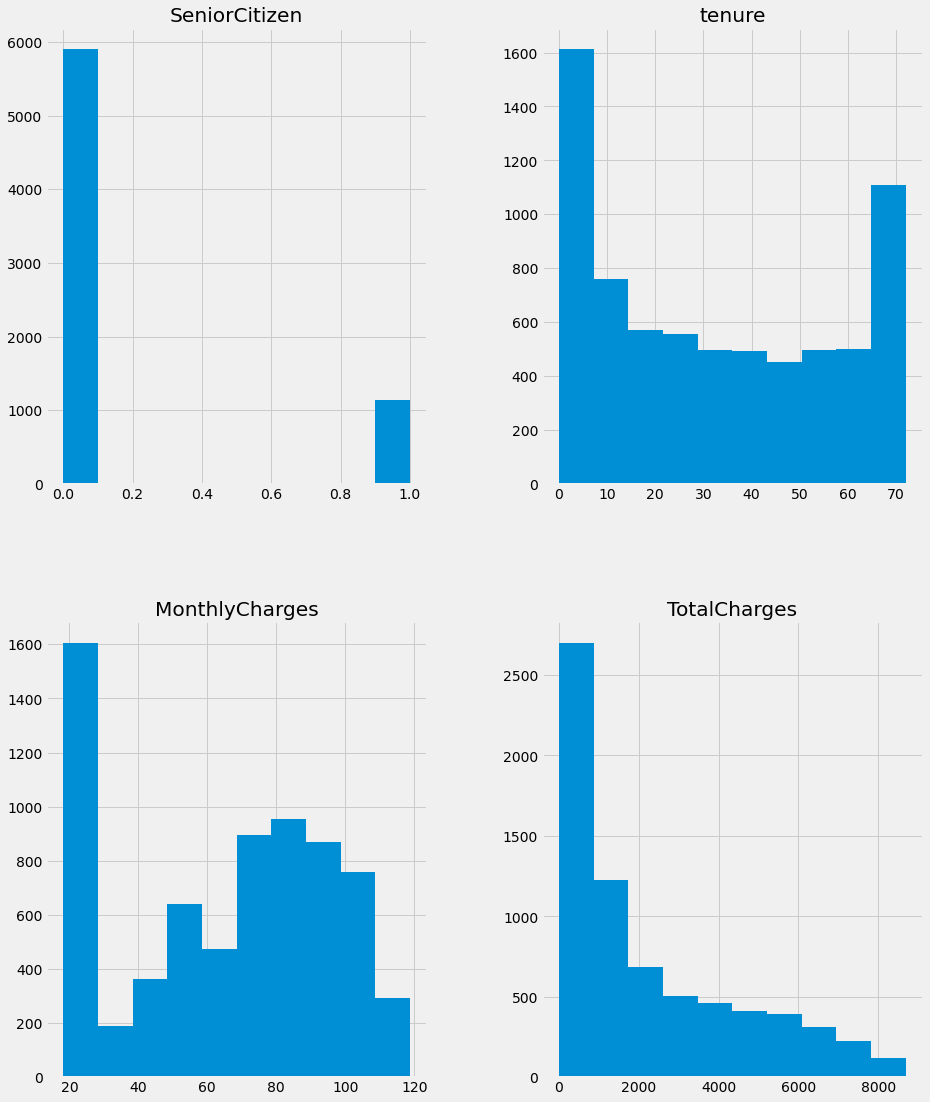

In [91]:
df.hist(figsize = (14,18), bins = 10)

D:\Python\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


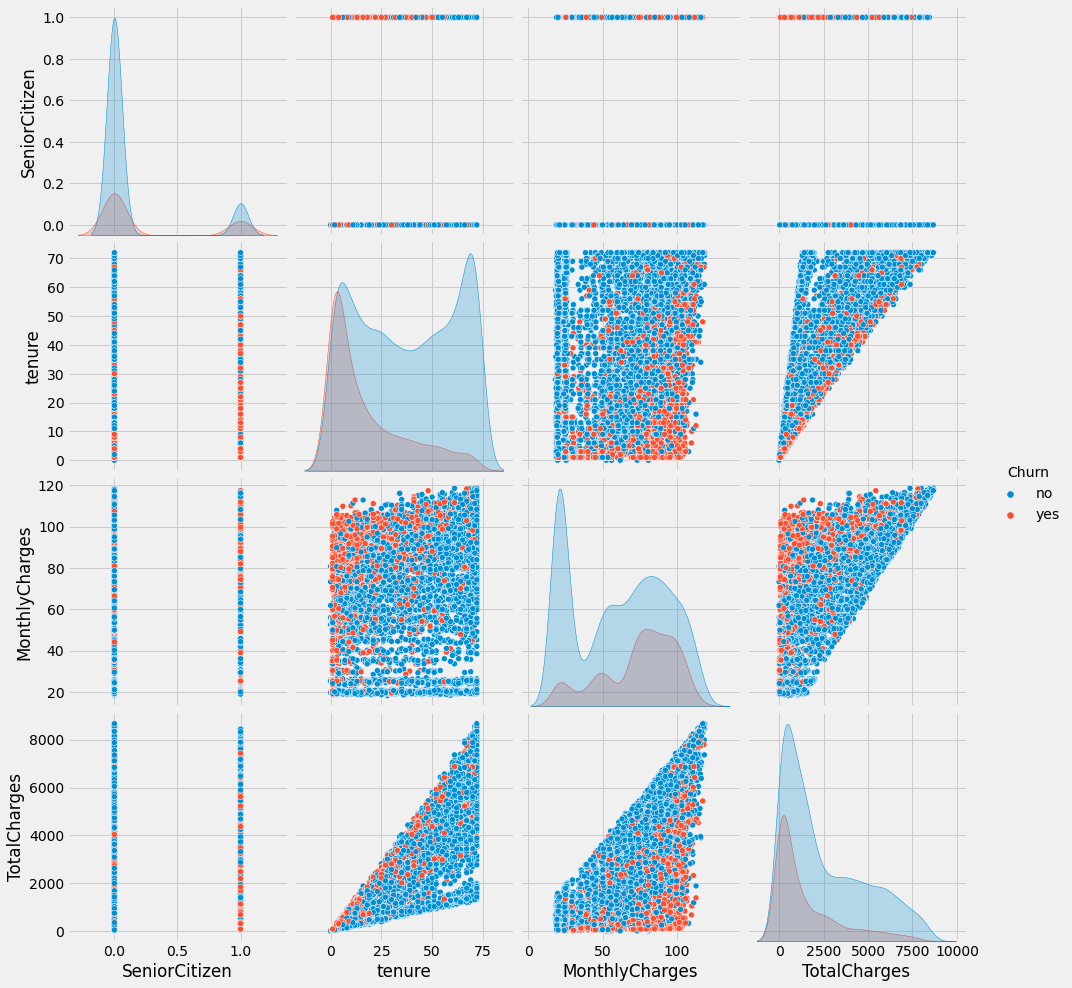

In [108]:
sns.pairplot(df, hue = 'Churn', size = 3.5)

I will define a converter function to change obj into boolean numerical. 

In [ ]:
to_convert = ['Churn']
for c in to_convert: 
    if c in df.columns: 
        df[c] = df[c].apply(converter)

In [ ]:
def converter(col): 
    if col == 'yes': 
        return 1 
    else: 
        return 0

In [95]:
df = df.drop('customerID',axis = 1)

In [96]:
df_dummies = pd.get_dummies(df)

In [97]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_female,gender_male,Partner_no,Partner_yes,Dependents_no,Dependents_yes,...,Contract_one year,Contract_two year,PaperlessBilling_no,PaperlessBilling_yes,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,Churn_no,Churn_yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [102]:
df_corr = df_dummies.corr()
